In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy.ma as ma

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html
NDVI data file is located in Canvas/Files/data

In [34]:
filename='NDVI_new_2007_2015mon.nc'   # name of the file
with xr.open_dataset(filename) as ds1:      
    print(ds1)
ds1.NDVI

<xarray.Dataset>
Dimensions:  (time: 108, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    NDVI     (time, lat, lon) float32 ...


<xarray.DataArray 'NDVI' (time: 108, lat: 180, lon: 360)>
[6998400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:        
    fill_value:  -1e-30

In [35]:
# mask out negative values
ndvi=ds1.NDVI.where(ds1.NDVI > 0.)
ndvi

<xarray.DataArray 'NDVI' (time: 108, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:        
    fill_value:  -1e-30

In [36]:
# Calculate climatology of each month
ndvi_clim = ndvi.groupby('time.month').mean(dim='time')
ndvi_clim

<xarray.DataArray 'NDVI' (month: 12, lat: 180, lon: 360)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:        
    fill_value:  -1e-30

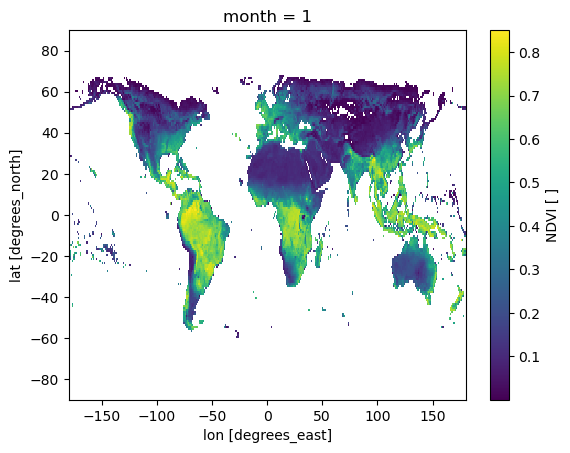

In [37]:
ndvi_clim.isel(month=0).plot()

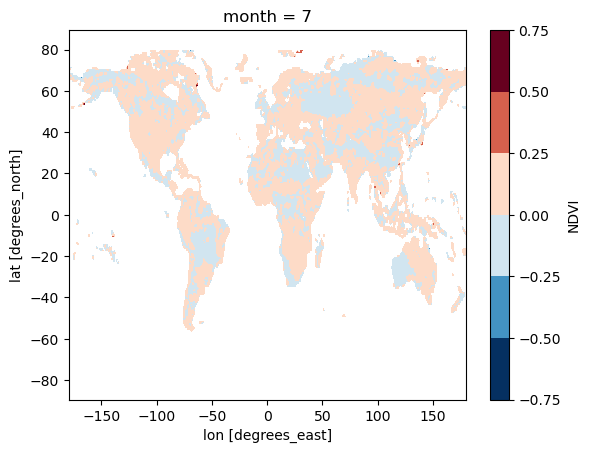

In [38]:
# Calculate and plot anomaly
anom=(ndvi.sel(time='2010-07').mean("time")-ndvi_clim.sel(month=7))
anom.plot.contourf()

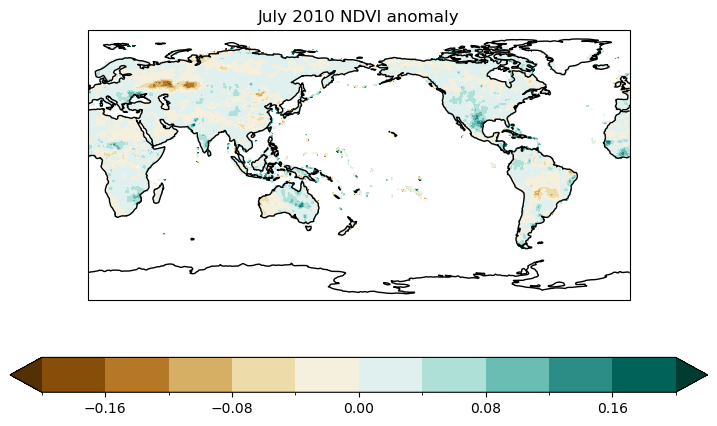

In [39]:
# Make a prettier plot

# contour level
lev1=np.arange(-0.2,0.21,0.04)

proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.BrBG

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=anom.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('July 2010 NDVI anomaly')
fig1.colorbar(cs, orientation='horizontal') # color map

Text(0.5, 1.0, 'July 2010 NDVI anomaly')

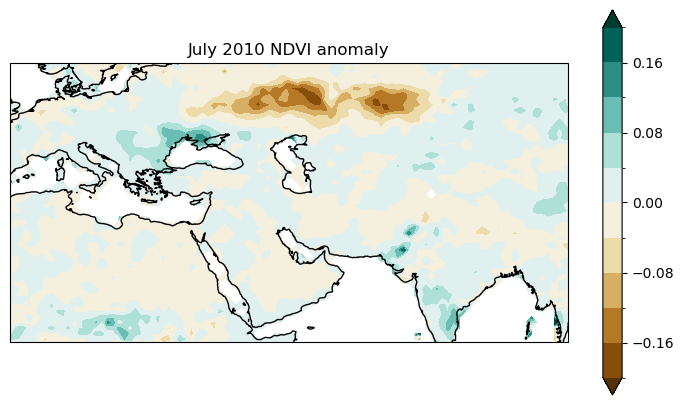

In [17]:
fig2 = plt.figure(figsize=(9,5))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=10))
ax2.set_extent([0, 100, 10, 60], ccrs.PlateCarree())
cs2=anom.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_labels=False)
ax2.coastlines()
plt.title('July 2010 NDVI anomaly')

We had a severe drought in the Midwest in 2012.

In [40]:
filename2="http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gistemp/combined/250km/air.2x2.250.mon.anom.comb.nc"
with xr.open_dataset(filename2) as ds2:
#    print(ds2)
    temp=ds2.air.sel(time=slice('1979', '2024'))
temp

<xarray.DataArray 'air' (time: 550, lat: 90, lon: 180)>
[8910000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Attributes: (12/14)
    long_name:      Monthly Average Temperature Anomalies
    valid_range:    [-25.  25.]
    units:          degC
    precision:      2
    var_desc:       Air Temperature: 250km smoothing combined
    dataset:        GISS Surface Temperature Analysis (GISTEMP)
    ...             ...
    parent_stat:    Individual obs
    cell_methods:   time: anomaly (monthly from values)
    standard_name:  air_temperature_anomaly
    comments:       ERSST V5 used for SST (starting Oct 25 2017 at PSD) from ...
    actual_range:   [-19.89452  19.78792]
    _ChunkSizes:    [  1  90 180]

In [41]:
# Calculate climatology of each month
temp_clim = temp.groupby('time.month').mean(dim='time')
temp_clim

<xarray.DataArray 'air' (month: 12, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.10073461, -0.10073461, -0.10073461, ..., -0.10073461,
         -0.10073461, -0.10073461],
        [-0.10073461, -0.10073461, -0.10073461, ..., -0.10073461,
         -0.10073461, -0.10073461],
        [-0.10073461, -0.10073461, -0.10073461, ..., -0.10073461,
         -0.10073461, -0.10073461]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.73586035,  0.73586035,  0.73586035, ...,  0.73586035,
          0.73586035,  0.73586035],
        [ 0.73586035,  0.73586035,  0.73586035, ...,  0.73586035,
          0.73586035,  0.73586035],
        [ 0.73586035,  0.73586035,  0.73586035, ...,  0.73586035,
          0.73586035,  0.73586035]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.4152117 ,  0.4152117 ,  0.4152117 , ...,  0.4152117 ,
          0.4152117 ,  0.4152117 ],
        [ 0.4152117 ,  0.4152117 ,  0.4152117 , ...,  0.4152117 ,
          0.4152117 ,  0.4152117 ],
        [ 0.4152117 ,  0.4152117 ,  0.4152117 , ...,  0.4152117 ,
          0.4152117 ,  0.4152117 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/14)
    long_name:      Monthly Average Temperature Anomalies
    valid_range:    [-25.  25.]
    units:          degC
    precision:      2
    var_desc:       Air Temperature: 250km smoothing combined
    dataset:        GISS Surface Temperature Analysis (GISTEMP)
    ...             ...
    parent_stat:    Individual obs
    cell_methods:   time: anomaly (monthly from values)
    standard_name:  air_temperature_anomaly
    comments:       ERSST V5 used for SST (starting Oct 25 2017 at PSD) from ...
    actual_range:   [-19.89452  19.78792]
    _ChunkSizes:    [  1  90 180]

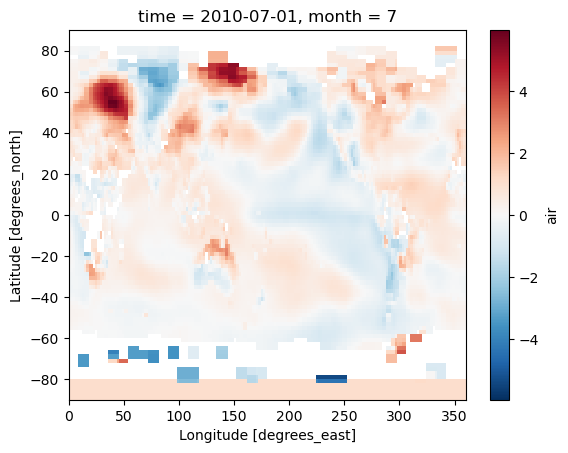

In [42]:
(temp.sel(time="2010-07")-temp_clim.sel(month=7)).plot()

In [43]:
# Below is how to read the GPCP precipitation data. We are not using this data here, but I kept it hear in case anyone needs it. 
file3 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
with xr.open_dataset(file3) as ds3:
    prec=ds3.precip
    print(prec)

<xarray.DataArray 'precip' (time: 550, lat: 72, lon: 144)>
[5702400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2024-10-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]
    _ChunkSizes:   [  1  72 144]


In [27]:
# Calculate climatology of each month
prec_clim = prec.groupby('time.month').mean(dim='time')
prec_clim

<xarray.DataArray 'precip' (month: 12, lat: 72, lon: 144)>
array([[[0.02274817, 0.0312449 , 0.03381426, ..., 0.0285017 ,
         0.02519023, 0.02042774],
        [0.01799171, 0.01790115, 0.01998969, ..., 0.02644754,
         0.02475137, 0.02195108],
        [0.02408362, 0.02378322, 0.02680739, ..., 0.03340565,
         0.03008985, 0.02644714],
        ...,
        [0.57498527, 0.5628935 , 0.5528861 , ..., 0.55916524,
         0.5340384 , 0.5588785 ],
        [0.4663421 , 0.48335192, 0.460614  , ..., 0.44232017,
         0.46346346, 0.4734675 ],
        [0.4509123 , 0.4218336 , 0.43145847, ..., 0.43247277,
         0.42488533, 0.451251  ]],

       [[0.06598889, 0.05866364, 0.07193193, ..., 0.04073803,
         0.05704224, 0.05794478],
        [0.04568734, 0.04881832, 0.04748526, ..., 0.04144093,
         0.0367105 , 0.05031118],
        [0.05900637, 0.0698652 , 0.05368968, ..., 0.07070965,
         0.06725159, 0.05503809],
...
        [0.62997943, 0.6337466 , 0.6436901 , ..., 0.5974017 ,
         0.6082704 , 0.5931457 ],
        [0.5075409 , 0.5260894 , 0.50887674, ..., 0.5051429 ,
         0.4934021 , 0.5075728 ],
        [0.4030621 , 0.408191  , 0.40196145, ..., 0.41745174,
         0.38897592, 0.4251227 ]],

       [[0.06343991, 0.06739467, 0.0599606 , ..., 0.06876473,
         0.06686606, 0.06278548],
        [0.04501276, 0.04454658, 0.04974975, ..., 0.05841898,
         0.06393174, 0.0556627 ],
        [0.05894417, 0.05300075, 0.04536035, ..., 0.06294147,
         0.06665938, 0.05982918],
        ...,
        [0.53768265, 0.5379367 , 0.55005735, ..., 0.52085686,
         0.5152426 , 0.5288203 ],
        [0.41961098, 0.41326213, 0.41504517, ..., 0.44120175,
         0.40851822, 0.4115647 ],
        [0.37075344, 0.35291734, 0.35173944, ..., 0.3556185 ,
         0.3998175 , 0.35349897]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.       47.327435]
    _ChunkSizes:   [  1  72 144]

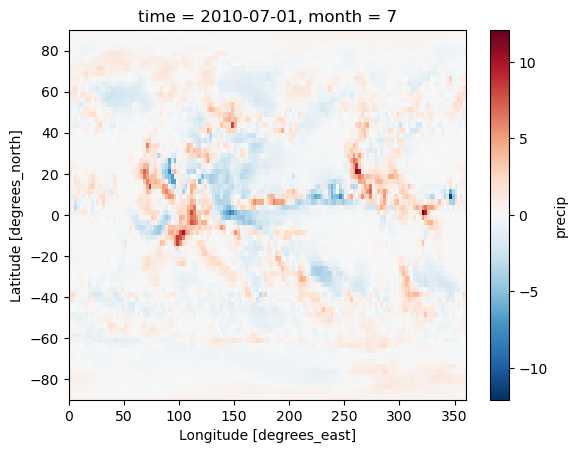

In [28]:
(prec.sel(time="2010-07")-prec_clim.sel(month=7)).plot()

In [44]:
# Geopotential height
file4 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/hgt.mon.mean.nc'
with xr.open_dataset(file4) as ds4:
    hgt=ds4.hgt.sel(level=200)
    print(hgt) 

<xarray.DataArray 'hgt' (time: 922, lat: 73, lon: 144)>
[9692064 values with dtype=float32]
Coordinates:
    level    float32 200.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-10-01
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes: (12/13)
    long_name:     Monthly mean geopotential height
    valid_range:   [ -700. 35000.]
    units:         m
    precision:     0
    GRIB_id:       7
    GRIB_name:     HGT
    ...            ...
    level_desc:    Pressure Levels
    statistic:     Mean
    parent_stat:   Other
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [ -354.45834 32321.098  ]
    _ChunkSizes:   [  1   1  73 144]


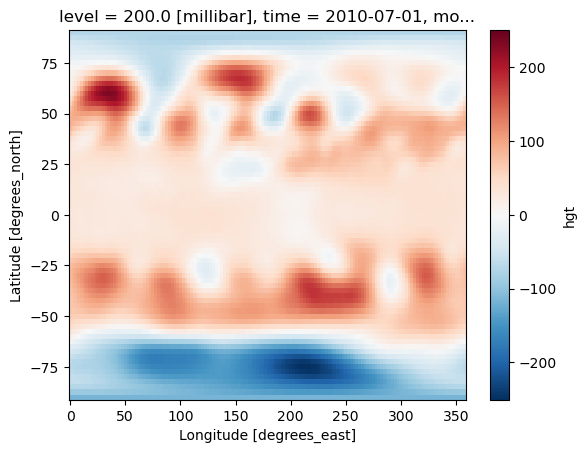

In [45]:
# Calculate climatology of each month
hgt_clim = hgt.groupby('time.month').mean(dim='time')
# Plot July 2010 anomaly
(hgt.sel(time="2010-07")-hgt_clim.sel(month=7)).plot()

### Exercise 1
Plat July 2010 wind anomaly at 850 hPa over the region around the Eastern Europe and India.

### Optional Exercises
Plot the global anomaly for July of 2012 around the US. Follow the steps above. What did you find?